In [1028]:
import pandas as pd
import matplotlib.pyplot as plt


In [1029]:
df = pd.read_csv("Salary_Data2.csv ", sep="," , encoding= 'UTF-8') 

In [1030]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [1031]:
df.dtypes

Age                    float64
Gender                  object
Education_Level         object
Job_Title               object
Years_of_Experience    float64
Salary                 float64
dtype: object

In [1032]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education_Level      6701 non-null   object 
 3   Job_Title            6702 non-null   object 
 4   Years_of_Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 1.3 MB


In [1033]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education_Level      6701 non-null   object 
 3   Job_Title            6702 non-null   object 
 4   Years_of_Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [1034]:
df.head(10)

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [1035]:
df.shape

(6704, 6)

In [1036]:
# Checar valores nulos no dataset
print("Valores nulos por coluna do dataframe:")
df.isnull().sum() # para vericar a quantidade de valores nulos 

Valores nulos por coluna do dataframe:


Age                    2
Gender                 2
Education_Level        3
Job_Title              2
Years_of_Experience    3
Salary                 5
dtype: int64

In [1037]:
# Remove entradas (linhas) contendo valores nulos em colunas específicas
df = df.dropna(subset=['Gender', 'Education_Level'])
df.shape

(6701, 6)

In [1038]:
# Checar valores nulos no dataset
print("Valores nulos por coluna do dataframe:")
df.isnull().sum() # para vericar a quantidade de valores nulos 

Valores nulos por coluna do dataframe:


Age                    0
Gender                 0
Education_Level        0
Job_Title              0
Years_of_Experience    1
Salary                 3
dtype: int64

In [1039]:
# Vamos substituir os valores contidos na coluna 'Sex' por 'F' e 'M'
df['Gender'] = df['Gender'].replace({'Male': 'M', 'Female': 'F'})

df.head(10) # alterando o número de entradas no retorno da função

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,M,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,F,Master's,Data Analyst,3.0,65000.0
2,45.0,M,PhD,Senior Manager,15.0,150000.0
3,36.0,F,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,M,Master's,Director,20.0,200000.0
5,29.0,M,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,F,Master's,Product Manager,12.0,120000.0
7,31.0,M,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,F,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,M,PhD,Senior Scientist,10.0,110000.0


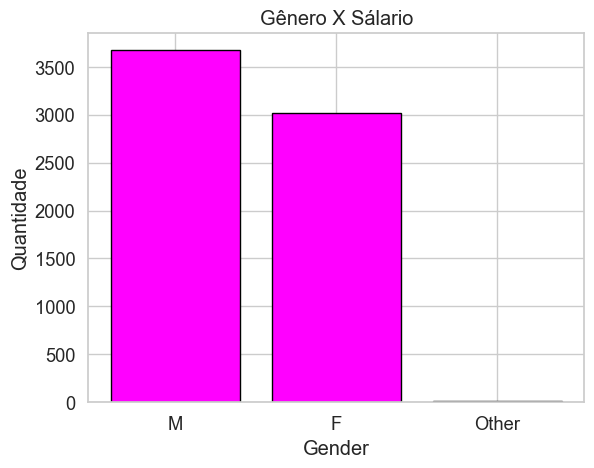

In [1040]:
contagem = df['Gender'].value_counts().head(5)

plt.bar(contagem.index, contagem.values, color='fuchsia', edgecolor='black')

plt.xlabel('Gender')
plt.ylabel('Quantidade')
plt.title('Gênero X Sálario')

# Exiba o gráfico
plt.show()

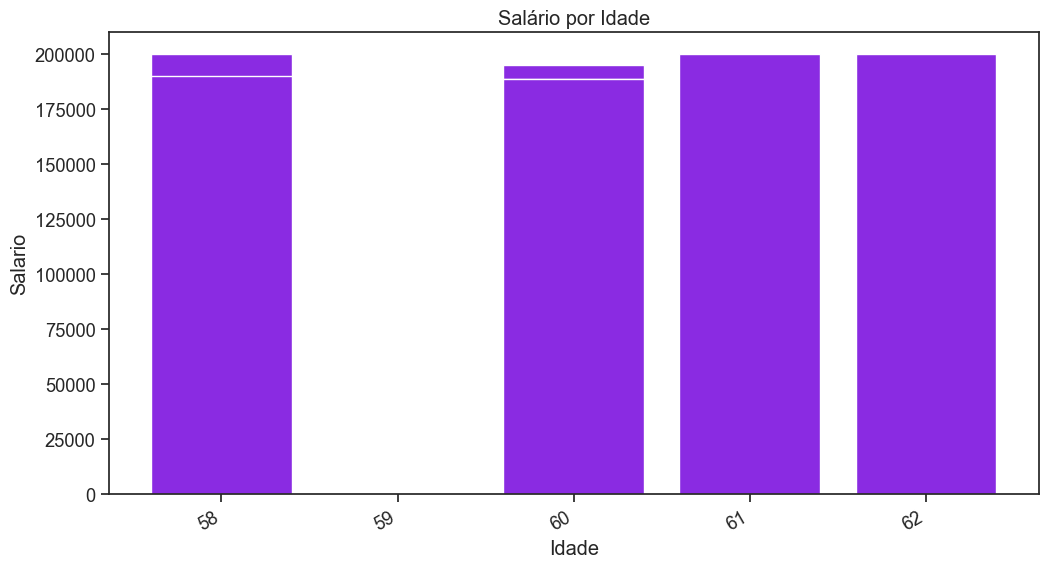

<Figure size 640x480 with 0 Axes>

In [1121]:
# Filtrando os top 5 por idade
top_Idade = df.sort_values(by='Age', ascending=False).head(15)

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_Idade['Age'], top_Idade['Salary'],color='blueviolet')
plt.xlabel('Idade')
plt.ylabel('Salario')
plt.title('Salário por Idade')
plt.xticks(rotation = 30, ha='right')

# Anotando o salário de cada pessoa no gráfico
for i, idade in enumerate(top_Idade['Age']):
    salario = top_Idade.iloc[i]['Salary']
    idade = top_Idade.iloc[i]['Age']

plt.annotate(f'{idade} anos, {idade}\nSalário: {salario}', (i, idade), ha='center', va='bottom')
plt.show();
plt.tight_layout();

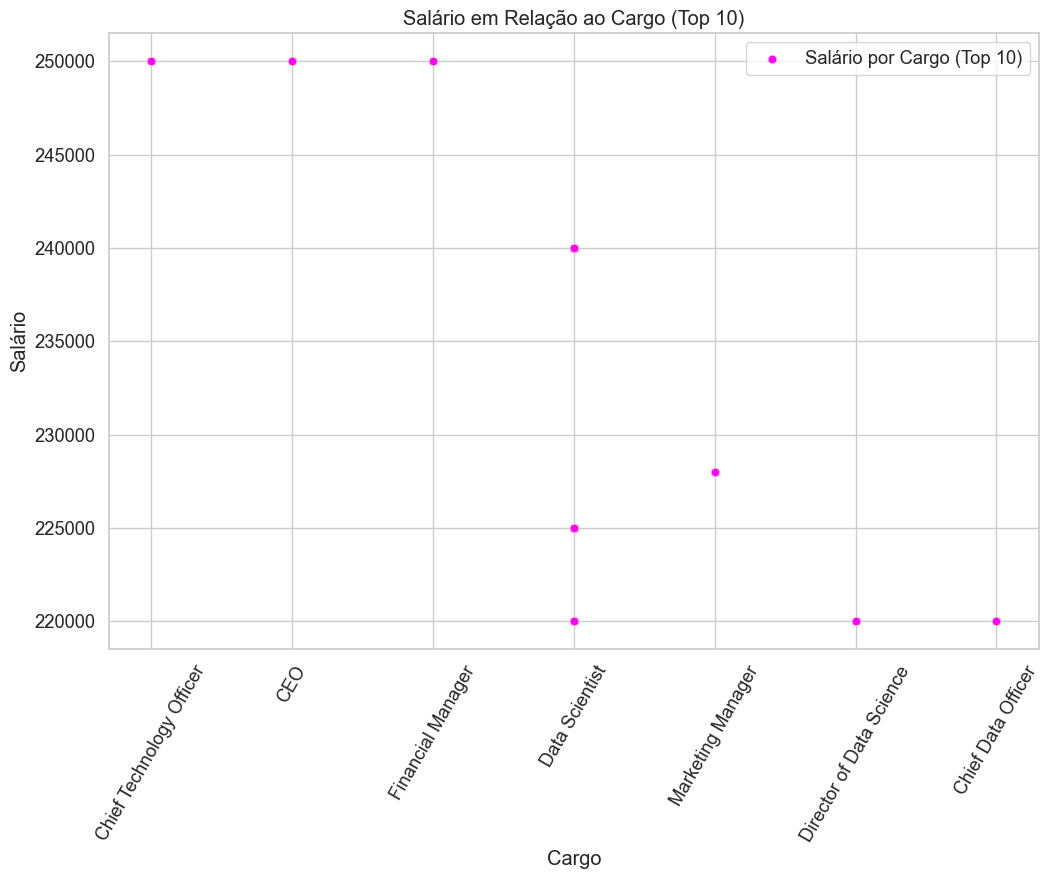

In [1077]:
# Ordenando o DataFrame pelos salários em ordem decrescente e selecionando os top 10
top_cargos = df.sort_values(by='Salary', ascending=False).head(25)

# Plotando o gráfico de dispersão com os top 10 cargos no eixo x
plt.figure(figsize=(12, 8))
plt.scatter(top_cargos['Job_Title'], top_cargos['Salary'], color='fuchsia', edgecolor='pink', marker='o', linestyle='-', linewidth=0.5, label='Salário por Cargo (Top 10)')
plt.xlabel("Cargo")
plt.ylabel("Salário")
plt.title("Salário em Relação ao Cargo (Top 10)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=60)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()


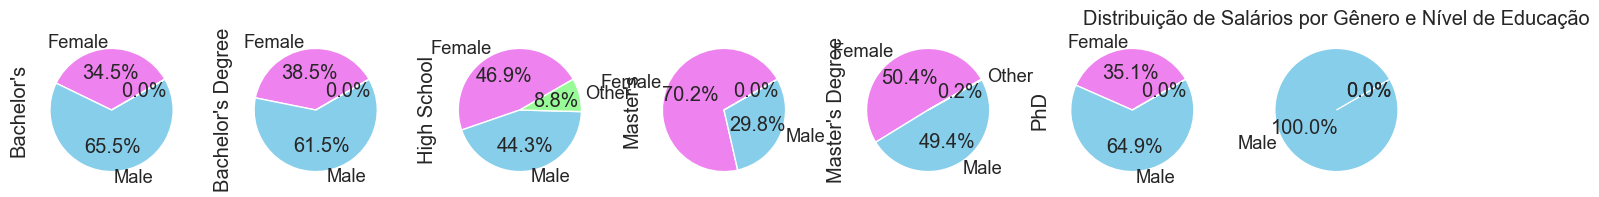

In [1130]:

# Agrupando os dados por 'Genero' e 'Nivel_de_educacao' e somando os salários
agrupado = df.groupby(['Gender', 'Education_Level']).sum()

cores = ["violet", "skyblue", "palegreen"]

# Criando o gráfico de pizza
agrupado['Salary'].unstack().plot(kind='pie', subplots=True, autopct='%1.1f%%', legend=False, figsize=(18, 2), colors=cores, startangle=30)

# Adicionando rótulos ao gráfico
plt.title('Distribuição de Salários por Gênero e Nível de Educação')
plt.ylabel('')
plt.show()

In [1044]:
import seaborn as sns


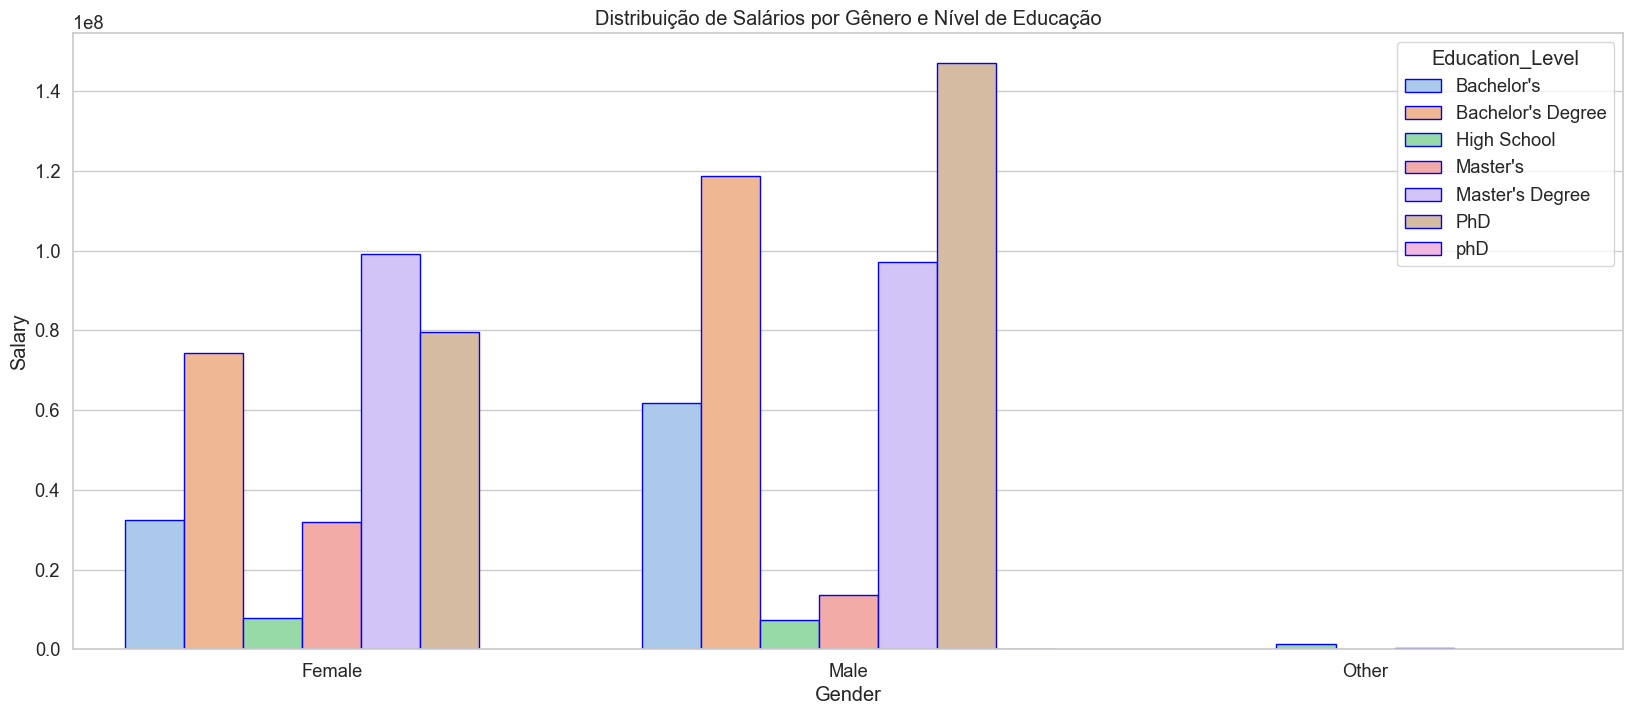

In [1073]:

# Agrupando os dados por 'Genero' e 'Nivel_de_educacao' e somando os salários
agrupado = df.groupby(['Gender', 'Education_Level']).sum()

# Redefinindo o índice para tornar as colunas 'Genero' e 'Nivel_de_educacao' em colunas do DataFrame
agrupado.reset_index(inplace=True)

# Criando o gráfico de barra usando seaborn
plt.figure(figsize=(20, 8))
sns.set(font_scale=1.2)  # Ajusta o tamanho da fonte
sns.set_palette("pastel")  # Define a paleta de cores
sns.set_style("whitegrid")  # Define o estilo do gráfico
plt.title('Distribuição de Salários por Gênero e Nível de Educação')

# Criando o gráfico de barras usando seaborn
sns.barplot(x='Gender', y='Salary', hue='Education_Level', data=agrupado, edgecolor='blue')
plt.show()


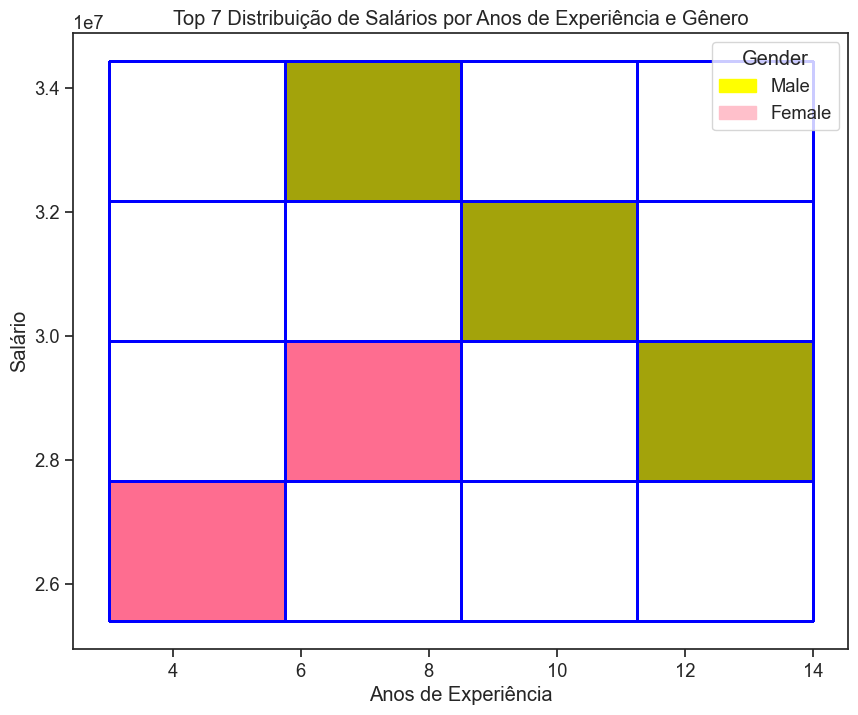

In [1119]:
# Obtendo os top 7 registros por salário
top7_experiencia_genero = agrupado_experiencia_genero.nlargest(7, 'Salary')

# Criando o gráfico de barra usando seaborn para os top 7 registros
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Ajusta o tamanho da fonte
sns.set_palette(sns.color_palette(["yellow", "pink"]))
sns.set_style("ticks")  # Define o estilo do gráfico
plt.title('Top 7 Distribuição de Salários por Anos de Experiência e Gênero')

# Criando o gráfico de barras usando seaborn para os top 7 registros
sns.histplot(x='Years_of_Experience', y='Salary', hue='Gender', data=top7_experiencia_genero, edgecolor='blue')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.show()





In [ ]:
import pandas as pd

def processamento_dados_csv(df):
    # Leitura do arquivo CSV
    df = pd.read_csv('Salary_Data2.csv')
    
    # Exibir as primeiras 3 linhas
    df_primeiras_3_linhas = df.head(3) #  

    # Arredondar para 2 casas decimais
    df_rounded = df.round(2)

    # Resumo do arredondamento
    resumo_arredondamento = df_rounded.describe().round(2)
    

    # Exibir colunas do DataFrame
    df_colunas = df.columns
    
    # ordenando os dados 

    df = df.sort_values('Gender')
    
    # Remover  dados duplicados

    df = df.drop_duplicates()
    
    # Resetar o índice
    df = df.reset_index(drop=True)
    
    
    #lista colunas 
    colunas = list(df.columns)
            
    traducao_colunas = {
    'Age': 'Idade',
    'Gender': 'Genero',
    'Education_Level': 'Nivel_de_educacao',
    'Job_Title': 'Cargo',
    'Years_of_Experience': 'Anos_de_experiencia',
    'Salary': 'Salario',
    
}
    df_editado = df.rename (columns = traducao_colunas)
    
    # Vamos substituir os valores contidos na coluna 'Gender' por 'F' e 'M'
    df_editado['Genero'] = df_editado['Genero'].replace({'Male': 'M', 'Female': 'F', 'Other': 'Outra/outro'})

    df_editado.head(10) # alterando o número de entradas no retorno da função
    
     
    # Checar valores nulos por coluna
    valores_nulos = df_editado.isnull().sum()
    # Checar valores nulos no dataset

        
          # Remove entradas (linhas) contendo valores nulos em colunas específicas
    df_remove_nulo  = df_editado.dropna(how='any')
    
    valores_nulos_removidos = df_editado.isnull().sum()

     
     #metricas : analise descritiva
    metricas = df_editado.describe(include= 'all')
    

    return df_primeiras_3_linhas, df_rounded, resumo_arredondamento, df_colunas, df, colunas, valores_nulos,df_remove_nulo,valores_nulos_removidos, df_editado, metricas



In [ ]:
df_primeiras_3_linhas, df_rounded, resumo_arredondamento, df_teste, df_colunas, colunas, valores_nulos, df_remove_nulo, valores_nulos_removidos, df_editado,metricas = processamento_dados_csv(df)


In [ ]:
df_editado

,Idade,Genero,Nivel_de_educacao,Cargo,Anos_de_experiencia,Salario
0,26.0,F,High School,Sales Executive,1.0,35000.0
1,28.0,F,Bachelor's Degree,Senior Project Engineer,4.0,70022.0
2,24.0,F,High School,Sales Associate,0.0,25000.0
3,43.0,F,Master's Degree,Senior Software Engineer,19.0,152944.0
4,29.0,F,Bachelor's Degree,Digital Marketing Specialist,3.0,60000.0
...,...,...,...,...,...,...
1787,53.0,Outra/outro,High School,Senior Project Engineer,31.0,166109.0
1788,37.0,Outra/outro,Master's Degree,Full Stack Engineer,14.0,161393.0
1789,25.0,Outra/outro,High School,Full Stack Engineer,2.0,69032.0
1790,54.0,Outra/outro,High School,Senior Software Engineer,29.0,158254.0


In [ ]:
df_teste

Index(['Age', 'Gender', 'Education_Level', 'Job_Title', 'Years_of_Experience',
       'Salary'],
      dtype='object')

In [ ]:
df_primeiras_3_linhas

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


In [ ]:
df_rounded

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
resumo_arredondamento

,Age,Years_of_Experience,Salary
count,6702.00,6701.00,6699.00
mean,33.62,8.09,115326.96
std,7.61,6.06,52786.18
min,21.00,0.00,350.00
25%,28.00,3.00,70000.00
50%,32.00,7.00,115000.00
75%,38.00,12.00,160000.00
max,62.00,34.00,250000.00


In [ ]:
df_colunas

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,26.0,Female,High School,Sales Executive,1.0,35000.0
1,28.0,Female,Bachelor's Degree,Senior Project Engineer,4.0,70022.0
2,24.0,Female,High School,Sales Associate,0.0,25000.0
3,43.0,Female,Master's Degree,Senior Software Engineer,19.0,152944.0
4,29.0,Female,Bachelor's Degree,Digital Marketing Specialist,3.0,60000.0
...,...,...,...,...,...,...
1787,53.0,Other,High School,Senior Project Engineer,31.0,166109.0
1788,37.0,Other,Master's Degree,Full Stack Engineer,14.0,161393.0
1789,25.0,Other,High School,Full Stack Engineer,2.0,69032.0
1790,54.0,Other,High School,Senior Software Engineer,29.0,158254.0


In [ ]:
colunas

['Age',
 'Gender',
 'Education_Level',
 'Job_Title',
 'Years_of_Experience',
 'Salary']

In [ ]:
valores_nulos

Idade                  1
Genero                 1
Nivel_de_educacao      2
Cargo                  1
Anos_de_experiencia    2
Salario                4
dtype: int64

In [ ]:
df_remove_nulo

,Idade,Genero,Nivel_de_educacao,Cargo,Anos_de_experiencia,Salario
0,26.0,F,High School,Sales Executive,1.0,35000.0
1,28.0,F,Bachelor's Degree,Senior Project Engineer,4.0,70022.0
2,24.0,F,High School,Sales Associate,0.0,25000.0
3,43.0,F,Master's Degree,Senior Software Engineer,19.0,152944.0
4,29.0,F,Bachelor's Degree,Digital Marketing Specialist,3.0,60000.0
...,...,...,...,...,...,...
1786,23.0,Outra/outro,High School,Front end Developer,2.0,62852.0
1787,53.0,Outra/outro,High School,Senior Project Engineer,31.0,166109.0
1788,37.0,Outra/outro,Master's Degree,Full Stack Engineer,14.0,161393.0
1789,25.0,Outra/outro,High School,Full Stack Engineer,2.0,69032.0


In [ ]:
df_editado.isnull().sum()


Idade                  1
Genero                 1
Nivel_de_educacao      2
Cargo                  1
Anos_de_experiencia    2
Salario                4
dtype: int64

In [ ]:
df_editado = df_editado.dropna(how='any')


In [ ]:
df_editado.isnull().sum()


Idade                  0
Genero                 0
Nivel_de_educacao      0
Cargo                  0
Anos_de_experiencia    0
Salario                0
dtype: int64

In [ ]:
metricas 

,Idade,Genero,Nivel_de_educacao,Cargo,Anos_de_experiencia,Salario
count,1791.000000,1791,1790,1791,1790.000000,1788.000000
unique,NaN,3,7,193,NaN,NaN
top,NaN,M,Bachelor's Degree,Software Engineer Manager,NaN,NaN
freq,NaN,969,508,127,NaN,NaN
mean,35.128420,NaN,NaN,NaN,9.152514,113177.285794
std,8.209562,NaN,NaN,NaN,6.839834,51583.040514
min,21.000000,NaN,NaN,NaN,0.000000,350.000000
25%,29.000000,NaN,NaN,NaN,3.000000,70000.000000
50%,33.000000,NaN,NaN,NaN,8.000000,110000.000000
75%,41.000000,NaN,NaN,NaN,13.000000,160000.000000


In [ ]:
traducao_colunas = {
    'Age': 'Idade',
    'Gender': 'Genero',
    'Education_Level': 'Nivel_de_educacao',
    'Job_Title': 'Cargo',
    'Years_of_Experience': 'Anos_de_experiencia',
    'Salary': 'Salario',
    
}
df_editado = df.rename (columns = traducao_colunas)
print("\nDataFrame após renomear colunas:")
print(df_editado)
